**Table of contents**<a id='toc0_'></a>    
- 1. [AS-AD for an open economy](#toc1_)    
- 2. [Analytical solution](#toc2_)    
- 3. [Numerical solution and calibration of model](#toc3_)    
- 4. [Further analysis (ideas)](#toc4_)    
- 5. [Conclusion](#toc5_)    


In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

from scipy import optimize

import sympy as sm
from IPython.display import display

## 2. <a id='toc2_'></a>[Setup](#toc0_)

1. AS-AD in open economy
2. Analytical solution
3. Numerical solution and calibration of model
- Simulation of model
4. Further analysis (ideas)
- Adjustment to equilibrium
- Demand vs supply shocks
- Long run AS-AD
5. Conclusion

## 1. <a id='toc1_'></a>[AS-AD for an open economy](#toc0_)


In our model project, we model two versions of the AS-AD model for an small, open economy, the first version being with fixed exchange rates and the second version being with floating exchange rates. The model equations are given by the following:

Firstly, we define **output and inflation gaps**:


1. **Output gap:** $$\hat{y}_{t} = y_t-\bar{y}$$
2. **Inflation gap:** $$\hat{\pi}_{t} = \pi_t-\pi^{\ast}$$

The model equations are given by the following:
1. **1 - AD-curve under fixed exchange rates:** $$y_{t}-\bar{y} = \beta_1 e^r_{t-1}-\beta_1(\pi_t-\pi^f) + z_t \Leftrightarrow$$
$$\pi_t = e^r_{t-1}+\pi^f-\frac{1}{\beta_1}(y_t-\bar{y})+\frac{z_t}{\beta_1} $$
1. **2 - AD-curve under floating exchange rates:** $$y_{t}-\bar{y} = \beta_1 e^r_{t-1}-\hat{\beta_1}(\pi_t-\pi^f) + z_t \Leftrightarrow$$
$$\pi_t = \frac{\beta_1}{\hat{\beta_1}} e^r_{t-1}+\pi^f-\frac{1}{\hat{\beta_1}} (y_t-\bar{y})+\frac{z_t}{\hat{\beta_1}} $$
$$where\  \hat\beta_1 = \beta_1 + h\left(\frac{\beta_1}{\theta}+\beta_2\right)>\beta_1$$

2. **Short-Run AS curve:** $$\pi_t = \pi^f + \gamma (y_t-\bar{y}) + s_t$$
3. **Real Exchange rate:** $$ e^r_t = e^r_{t-1}+\pi^f-\pi_t$$
4. **Demand shock:** $$z_{t} = \delta z_{t-1}+x_{t}, x_{t} \sim N(0,\sigma_x^2)$$
5. **Supply shock:** $$s_{t} = \omega s_{t-1}+c_{t}, c_{t} \sim N(0,\sigma_c^2)$$

It can be seen above that the economy with a fixed and floating exchange rate are equal when h = 0, as then $\hat\beta_1 = \beta_1$

__Model equations:__

__The AD curve (1):__

The Aggregate Demand curve represents the total demand for all goods and services in an economy at different price levels, holding all else constant. The higher the real exchange rate $e^r_{t-1}$, the more expensive it is to buy foreign goods, increasing inflation for a given $e^r_{t-1}$, shifting the AD-curve upwards. The higher the foreign inflation $\pi^f$, the higher the domestic inflation for a given $\pi^f$, shifting the AD-curve upwards. If there is a positive demand shock, i.e. the term $\frac{z_t}{\beta_1}$, there is a higher demand for a given inflation level, shifting the AD-cruve upwards.

Lastly, we turn to the term $-\frac{1}{\beta_1}(y_t-\bar{y})$, which shows that the AD curve is downward-sloping, indicating that lower price levels increase the overall demand for goods and services and vice versa. Why is the AD curve downwards sloping, i.e. why is there a negative correlation between inflation and outputgap in the AD curve? There are a number of factors explaining this, some of the most dynamics being as follows:

1) The foreign trade effect. The lower the price level, the cheaper the domestic goods, resulting in an increasing demand for domestic goods and thus a positive output gap as domestic production increases.

2) The Wealth effect. The lower the price level, the more goods can be bought for a given amount of wealth, increasing production and output gap.

3) The interest rate effect. The higher the price level, the more wealth is needed to buy, goods, increasing the competition for borrowing money, which increases the interest rates. The increased interest rates slows down the economy, resulting in a negative output gap.


__The Short-Run AS curve (2):__

The AS curve denotes the aggregate supply function in the economy, modelling a positive relation between inflation in period t, and current output gap. The intuition is straightforward: If $\pi^f$ increases, domestic inflation increases, shifting the AS curve upwards as production becomes more expensive, lowering the supply for a given inflation level. If there is a positive supply shock, $s_t>0$, the AS curve shifts upwards, as the production lowers ???????????????????????????????????????????????????

Lastly, the term $\gamma(y_t-\bar{y})$ shows that there is a positive relation between outputgap and inflation levels. If price levels in the economy increases, and the costs of production for the producers does not increase at the same rate, there is an incentive to produce more, resulting in a positive output gap. 

__The Real Exchange Rate (3):__
$e^r_t$: The (log) real exchange rate, which is given by the real exchange rate in previous period plus the difference in price level in period t, ($\pi^f-\pi_t$). The real interest rate denotes the real price level in the world compared to domestic price levels in the same currency. The interpretation is that $e_t^r$ denotes the real price of 1 unit of a foreign good in units of domestic goods; i.e. a $e_t^r$ of 0.7 means that we can get 0.7 foreign goods in exchange of 1 domestic good. There are effects both ways in regards of $e_t^r$: The higher the $e_t^r$, the domestic economy is more competitive, as foreign goods are relatively more expensive than domestic goods. On the other hand, the higher the $e_t^r$, the less foreign goods we can get in exchange of domestic goods, as domestic goods are relatively cheaper, so our trading capabilities are worse.

__The Demand shock (4):__
The demand shock is given by a persistence term, $\delta z_{t-1}$ which is the demand shock in the previous period, indicating that a demand shock gradually converges to 0 as $\delta<1$. The $c_t$ term is stochastic and normally distributed with mean 0 and variance $\sigma^2_c$.

__The Supply shock (5):__
The supply shock is given by a persistence term, $\omega s_{t-1}$ which is the demand shock in the previous period, indicating that a demand shock gradually converges to 0 as $\delta<1$. The $x_t$ term is stochastic and normally distributed with mean 0 and variance $\sigma^2_x$.


__The model parameters are:__

$\beta_1$: Measures the responsiveness of the real GDP to the real exchange rate in previous period $e_{t-1}^r$, foreign inflation $\pi^f$ and domestic inflation $\pi_t$. 

$\pi^f$: Foreign inflation, which is given since we are in a small, open economy, and due to the economy's small size, domestic prices are not big enough to affect the inflation level in the world.

$\gamma$: A parameter crucial for the relation between the output gap and inflation, linking the real economic activity in the output gap with nominal variables (inflation). The higher the $\gamma$, the greater response in inflation for a given output gap.

$\delta$ and $\omega$: Captures the persistence of the demand and supply shocks, respectively.

__The model variables are:__

$y_t$: Output, measures real economic activity. $y_t-\bar{y}$ measures the output gap in the economy, with $\bar{y}$ denoting natural output, i.e. the output level when the economy is at full employment.

$e^r_t$: The (log) real exchange rate, which is given by the real exchange rate in previous period plus the difference in price level in period t ($\pi^f-\pi_t$).


$\pi_t$: Inflation level.

$z_t$: Demand shock, which is given by (if any) the shock in previous period "discounted" with a persistence factor $\delta$ and a stochastic term $x_t$, which is normally distributed with mean 0 and variance $\sigma^2_x$.

$s_t$: Supply shock which is given by (if any) the shock in previous period "discounted$ with a persistence factor $\omega$ and a stochastic term $c_t$, which is normally distributed with mean 0 and variance $\sigma^2_c$.

## 2. <a id='toc1_'></a>[Analytical Solution](#toc0_)


## The floating exchange rate economy
The model can be rewritten by firstly inserting AS in AD and isolating for $e_{t-1}^r$:

$$
\hat{y}_t = \beta_1 e_{t-1}^r - \hat\beta_1 \gamma \hat{y}_t - \hat\beta_1 s_t + z_t \Leftrightarrow $$


$$
e_{t-1}^r = \frac{1+\hat\beta_1 \gamma}{\beta_1} \hat{y}_t + \frac{\hat\beta_1}{\beta} s_{t}-\frac{1}{\beta_1} z_t
$$

Inserting this in the exchange rate as well as AS we have:

$$
\frac{1+\hat\beta_1 \gamma}{\beta_1} \hat{y}_{t} + \frac{\hat\beta_1}{\beta} s_{t} - \frac{1}{\beta_1} z_{t} = \frac{1+\hat\beta_1 \gamma}{\beta_1} \hat{y}_{t-1} + \frac{\hat\beta_1}{\beta_1} s_{t-1} - \frac{1}{\beta_1} z_{t-1} - \gamma \hat{y}_{t-1} - s_{t-1} \Leftrightarrow
$$

$$
\frac{1+\hat\beta_1 \gamma}{\beta_1} \hat{y}_{t} = \frac{1+\gamma(\hat\beta_1-\beta_1)}{\beta_1} \hat{y}_{t-1} + \frac{1}{\beta_1} (z_{t} - z_{t-1}) -\frac{\hat\beta_1}{\beta_1} \left(s_{t}-s_{t-1}\left(1-\frac{\beta_1}{\hat\beta_1}\right)\right) \Leftrightarrow
$$

$$
\hat{y}_t = a(1+b)\hat{y}_{t-1} + a(z_t - z_{t-1}) - a\left(\hat\beta_1 s_{t}-s_{t-1}({\hat\beta_1-\beta_1})\right) \quad \text{(*)}
$$

Repeating the same steps for the inflation gap gives:

$$
\hat{\pi}_t = a(1+b)\hat{\pi}_{t-1} + a (s_t - s_{t-1}) + a\gamma(z_t - z_{t-1}) \quad \text{(**)}
$$

where 

$$
a = \frac{1}{1+\beta_1 \gamma}
$$
$$
b = \gamma(\hat\beta_1-\beta_1)
$$



## The fixed exchange rate economy
The model for the fixed exchange rate is a special case of the floating exchange rate economy, which is found by setting $\hat\beta_1 = \beta_1$. The model for the fixed exchange rate economy is:

$$
\hat{y}_t = a\hat{y}_{t-1} + a(z_t - z_{t-1}) - a\beta_1 s_t \quad \text{(***)}
$$

$$
\hat{\pi}_t = a \hat{\pi}_{t-1} + a (s_t - s_{t-1}) + a\gamma(z_t - z_{t-1}) \quad \text{(****)}
$$



## 3. <a id='toc3_'></a>[Numerical solution and calibration of model](#toc0_)

In [108]:
%load_ext autoreload
%autoreload 2

from types import SimpleNamespace
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

from test_oliver import ASADClass 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
model = ASADClass()
par = model.par
sim = model.sim
print(f'{par.a = :.4f}')
print(f'{par.b = :.4f}')
print(f'{par.beta1_hat = :.4f}')
print(f'{par.beta1 = :.4f}')

par.a = 0.9709
par.b = 0.0454
par.beta1_hat = 1.0048
par.beta1 = 0.4000


In [110]:
model.simulate_fixed()
model.simulate_floating()

Using the simulate method from ASADClass, we simulate the full model, drawing random shock simulations and drawing output gaps and inflation gaps.

In [111]:
print("Output Gap:", model.sim.y_hat_fixed)
print("Inflation Gap:", model.sim.pi_hat_fixed)
print("Demand shocks", model.sim.z)
print("Supply shocks", model.sim.s)

print("Output Gap:", model.sim.y_hat_floating)
print("Inflation Gap:", model.sim.pi_hat_floating)
print("Demand shocks", model.sim.z)
print("Supply shocks", model.sim.s)

Output Gap: [-0.43839204 -2.1144941  -2.14635014 ...  0.42040062  2.10106215
  1.26436837]
Inflation Gap: [-0.11749703 -0.32993405 -0.08918111 ...  0.05833214  0.14593146
  0.14521224]
Demand shocks [-0.48539085 -2.29346653 -2.36099502 ...  1.20861235  2.94764647
  2.16903758]
Supply shocks [-0.08461762 -0.171347    0.07179515 ...  0.02680209 -0.01164821
  0.05038461]
Output Gap: [-3.88701904e-01 -2.01857682e+00 -2.25683713e+00 ... -1.05044287e+64
 -1.06611144e+64 -1.08201372e+64]
Inflation Gap: [-1.17497027e-01 -3.35108900e-01 -1.08964222e-01 ... -4.13386424e+62
 -4.19552558e+62 -4.25810668e+62]
Demand shocks [-0.48539085 -2.29346653 -2.36099502 ...  1.20861235  2.94764647
  2.16903758]
Supply shocks [-0.08461762 -0.171347    0.07179515 ...  0.02680209 -0.01164821
  0.05038461]


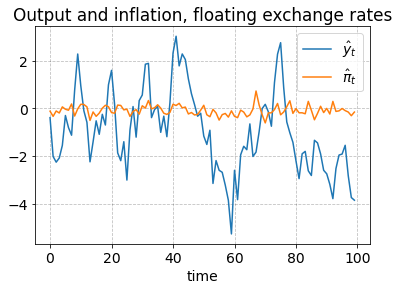

In [119]:
#Simulation for floating exchange rates
simT_fig = 100 # first 100 periods
fig = plt.figure() #Creates new figure
ax = fig.add_subplot(1,1,1) #One subplot in a 1 row by 1 column. This is the first subplot.
ax.plot(np.arange(simT_fig),sim.y_hat_floating[:simT_fig],label='$\\hat{y}_t$') #np.arrange(simT_fig) generates an array of integers from 0 t0 100, serving as the time axis.
ax.plot(np.arange(simT_fig),sim.pi_hat_floating[:simT_fig],label='$\\hat{\pi}_t$') #Second plot; inflation deviations.
ax.set_xlabel('time') #label on x-axis is "time"
ax.set_title('Output and inflation, floating exchange rates')
ax.legend(frameon=True); #adds legends to the plot, helps identifying each line plot with its corresponding label. "Frameon=True" ensures that the legend has a frame.

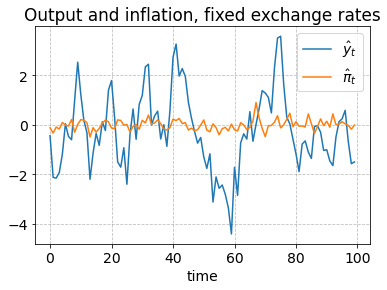

In [121]:
#Simulation for fixed exchange rates
simT_fig = 100 # first 100 periods
fig = plt.figure() #Creates new figure
ax = fig.add_subplot(1,1,1) #One subplot in a 1 row by 1 column. This is the first subplot.
ax.plot(np.arange(simT_fig),sim.y_hat_fixed[:simT_fig],label='$\\hat{y}_t$') #np.arrange(simT_fig) generates an array of integers from 0 t0 100, serving as the time axis.
ax.plot(np.arange(simT_fig),sim.pi_hat_fixed[:simT_fig],label='$\\hat{\pi}_t$') #Second plot; inflation deviations.
ax.set_xlabel('time') #label on x-axis is "time"
ax.set_title('Output and inflation, fixed exchange rates')
ax.legend(frameon=True); #adds legends to the plot, helps identifying each line plot with its corresponding label. "Frameon=True" ensures that the legend has a frame.

In [9]:
model.calc_moms() # calculate moments from the simulation
error = model.calc_diff_to_data(do_print=True) # compares with the data

std_y       | data = 1.6400, model = 1.5748
std_pi      | data = 0.2100, model = 0.2442
corr_y_pi   | data = 0.3100, model = 0.4263
autocorr_y  | data = 0.8400, model = 0.7905
autocorr_pi | data = 0.4800, model = 0.4319
error =   0.02372299


## 4. <a id='toc4_'></a>[Further analysis (ideas)](#toc0_)

Fast og flydende valutakurs, asgers grafer.

## 5. <a id='toc5_'></a>[Conclusion](#toc0_)